---
## Bayes Classifier

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def probs(avg, std, py, x):
    '''
    Notation:
        p_x0 : p(x|y=0)
        p_x1 : p(x|y=1)
        px   : p(x)
        py   : p(y)
        p0_x : p(y=0|x)
        p1_x : p(y=1|x)
        px0  : p(x,y=0)
        px1  : p(x,y=1)
    '''
    px_0 = stats.norm.pdf(x, avg[0], std[0])
    px_1 = stats.norm.pdf(x, avg[1], std[1])
    px0 = px_0*py[0]
    px1 = px_1*py[1]
    px = px0 + px1
    p0_x = px0/px
    p1_x = px1/px
    #       p(x, y)     p(y | x)      p(x | y)     p(x)
    return [px0, px1], [p0_x, p1_x], [px_0, px_1], px

def true_risk(t, avg, std, py):
    ''' 
    Note: 
        1. cdf is defined as f(t) = P(x <= t)
        2. 1 - f(t) = P(x > t)
        3. Risk = P(f(x)!= y) 
                = P(f(x) = 1, y = 0) + P(f(x) = 0, y = 1)
                = P(x > t, y = 0) + P(x < t, y = 1)
                = P(x > t | y = 0) P(y = 0) + P(x < t | y = 1) P(y = 1)
    '''
    # False Positive Rate (FPR): P(x > t | y = female)
    FPR = 1 - stats.norm.cdf(t, avg[0], std[0])
    # False Negative Rate (FNR): p(x < t | y = male)
    FNR = stats.norm.cdf(t, avg[1], std[1])
    # True Risk: Weighted sum of FPR and FNR
    risk = py[0] * FPR + py[1] * FNR
    return risk

In [6]:
def plot(py_x, px_y, px, py, risk, x):

    colors = ['tab:orange','tab:blue', 'black']
   
    _, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    # likelihoods and evidence
    axs[0,0].plot(x, px_y[0], color=colors[0], lw=2, label='$p(x | y=0)$')
    axs[0,0].plot(x, px_y[1], color=colors[1], lw=2, label='$p(x | y=1)$')
    axs[0,0].plot(x, px, color=colors[2], lw=2, label='$p(x)$')
    axs[0,0].set_title('likelihoods p(x|y) and evidence p(x)')
    axs[0,0].legend()
    
    # priors
    axs[0,1].bar(['$y=0$', 'y=1'], py, width=0.4, color=colors, alpha=0.5)
    axs[0,1].set_title('priors p(y)')
    axs[0,1].set_ylim([0, 1])
    
    
    # posteriors
    axs[1,0].plot(x, py_x[0], color=colors[0], lw=2, label='$p(y=0|x)$')
    axs[1,0].plot(x, py_x[1], color=colors[1], lw=2, label='$p(y=1|x)$')
    axs[1,0].set_xlim()
    axs[1,0].set_title('posteriors p(y|x)')
    axs[1,0].legend()

    # true risk
    axs[1,1].plot(x, risk, color=colors[2], lw=2)
    axs[1,1].set_xlim()
    axs[1,1].set_title('true risk $R(f^*)$')

    plt.tight_layout()
    plt.show()


def run(avg, std, py, x):

    _, py_x, px_y, px = probs(avg, std, py, x)
    risk = true_risk(x, avg, std, py)

    # risk 
    dx = x[1] - x[0]  
    R = np.sum(np.minimum(py_x[0], py_x[1]) * px) * dx
    print(f'R* = {R:.2f}')
    
    # likelihoods: find x such that p(x|0) = p(x|1)
    n = int(len(x)/10)
    i0 = np.argmin(np.abs(px_y[0][n:-n]-px_y[1][n:-n]))
    print(f'p(x|1) = p(x|0) at x = {x[i0+n]:.2f}')

    # posteriors: find x such that p(0|x) = p(1|x)
    i0 = np.argmin(np.abs(py_x[0]-py_x[1]))
    print(f'p(1|x) = p(0|x) at x = {x[i0]:.2f}')

    # plot
    plot(py_x, px_y, px, py, risk, x)

## Demo 1

R* = 0.11
p(x|1) = p(x|0) at x = 170.00
p(1|x) = p(0|x) at x = 170.00


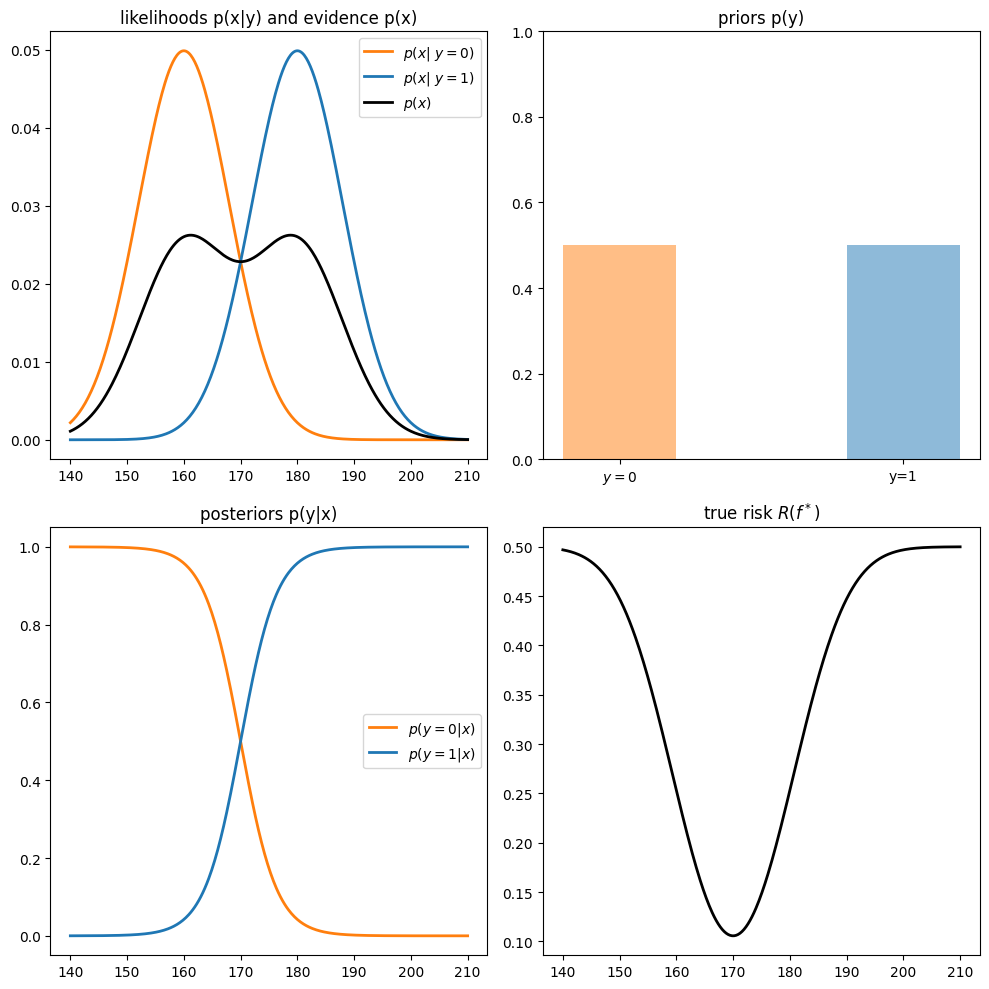

In [7]:
n = 400
xlim = [140, 210]
x = np.linspace(xlim[0], xlim[1], n)

avg = np.array([160., 180.])
std = np.array([8., 8.])
py = [0.5, 0.5]

run(avg, std, py, x)

## Demo 2

R* = 0.14
p(x|1) = p(x|0) at x = 111.03
p(1|x) = p(0|x) at x = 119.02


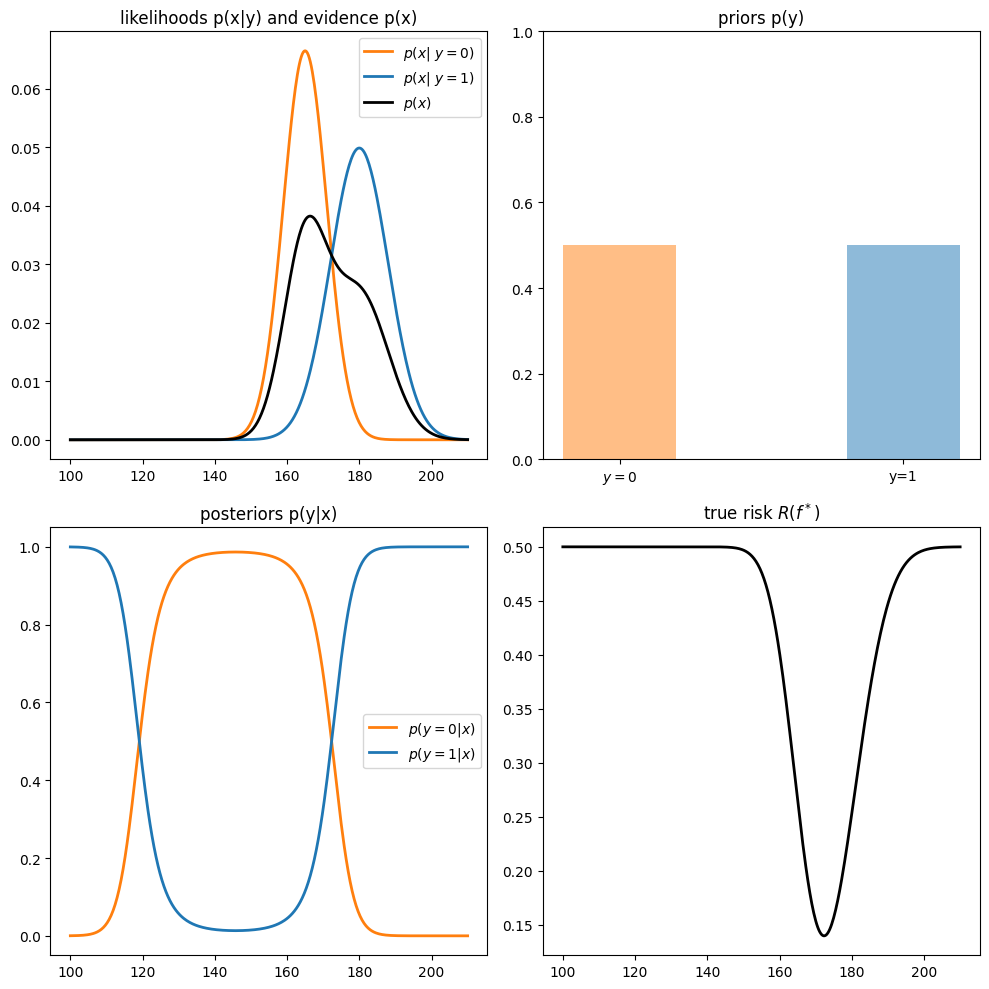

In [8]:
n = 400
xlim = [100, 210]
x = np.linspace(xlim[0], xlim[1], n)

avg = np.array([165., 180.])
std = np.array([6., 8.])
py = [0.5, 0.5]

run(avg, std, py, x)